# RentalHop Rental Inquiries Dataset

In [1]:
import numpy as np
import pandas as pd
import datetime

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
# Read in the training data
df = pd.read_json('train.json')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [6]:
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [7]:
df.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'interest_level', 'latitude',
       'listing_id', 'longitude', 'manager_id', 'photos', 'price',
       'street_address'],
      dtype='object')

From a quick overview of the dataset,
building_id - does not seem to be very helpful, as it just seems to be a random string of alphanumeric characters

In [8]:
df['created'].head()

10        2016-06-24 07:54:24
10000     2016-06-12 12:19:27
100004    2016-04-17 03:26:41
100007    2016-04-18 02:22:02
100013    2016-04-28 01:32:41
Name: created, dtype: object

In [9]:
min(df['created'])

'2016-04-01 22:12:41'

In [10]:
max(df['created'])

'2016-06-29 21:41:47'

The created column spans over 2 months and mainly reflects the date that these online records for each property were create. Probably does not have much significance over the interest in property

In [11]:
# df.drop('building_id',axis)

In [12]:
df.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'interest_level', 'latitude',
       'listing_id', 'longitude', 'manager_id', 'photos', 'price',
       'street_address'],
      dtype='object')

In [13]:
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [14]:
# Collect the numerical information together into a separate dataframe
df_select = df[['bathrooms', 'bedrooms','interest_level', 'latitude','longitude','price']]
df_select.head()

,bathrooms,bedrooms,interest_level,latitude,longitude,price
10,1.5,3,medium,40.7145,-73.9425,3000
10000,1.0,2,low,40.7947,-73.9667,5465
100004,1.0,1,high,40.7388,-74.0018,2850
100007,1.0,1,low,40.7539,-73.9677,3275
100013,1.0,4,low,40.8241,-73.9493,3350


## EDA

First lets visualize the relations between price and some of these attributes

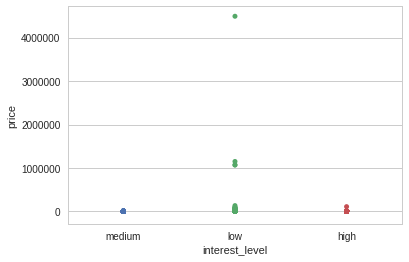

In [15]:
sns.set_style("whitegrid")
sns.stripplot(x="interest_level", y="price", data=df_select);

Lets check the data in the price range < 500,000

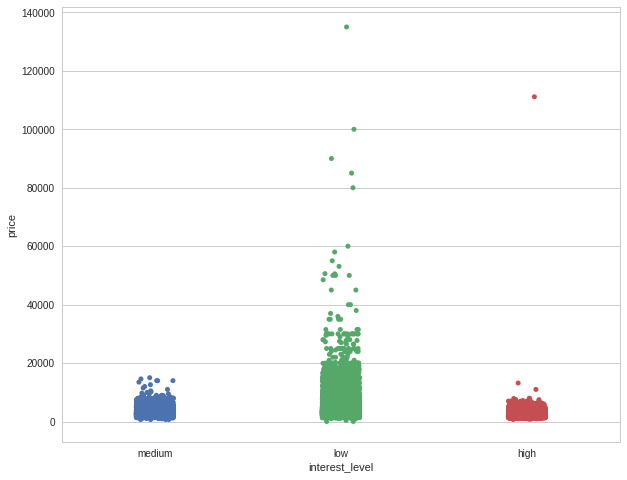

In [16]:
plt.figure(figsize=(10, 8))
sns.stripplot(x="interest_level", y="price", data=df.loc[df_select['price'] < 500000], jitter=True)

Most of the high interest properties appear to lie in the lowest price range, also the number of training data available for each category is as below

In [17]:
df['interest_level'].value_counts()

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64

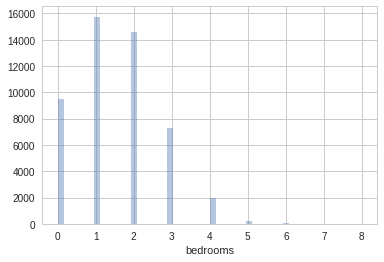

In [18]:
sns.distplot(df['bedrooms'], kde=False)

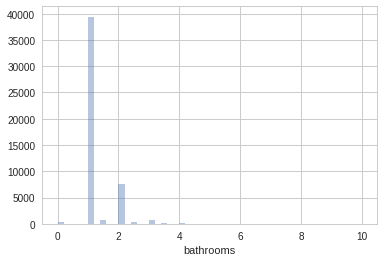

In [19]:
sns.distplot(df['bathrooms'], kde=False)

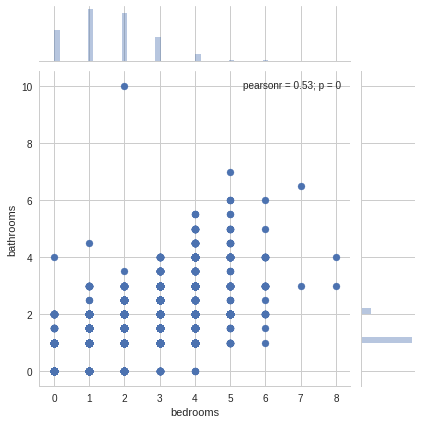

In [20]:
sns.jointplot(x='bedrooms', y='bathrooms', data=df)

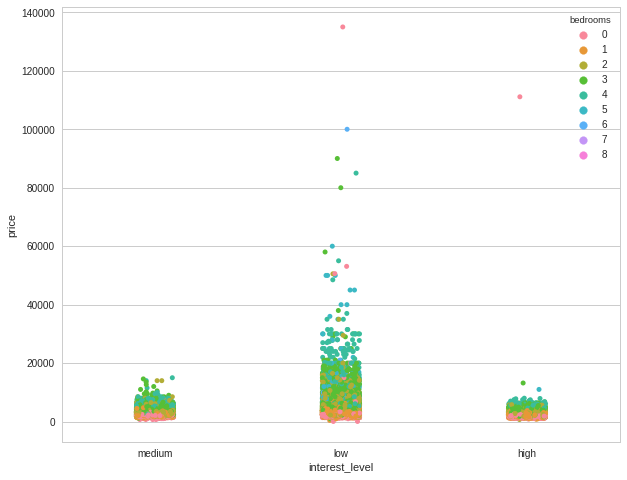

In [21]:
# Check out the variations with the number of bedrooms
plt.figure(figsize=(10, 8))
sns.stripplot(x="interest_level", y="price", data=df.loc[df_select['price'] < 500000], jitter=True, hue='bedrooms')

## Exploring geographical plotting

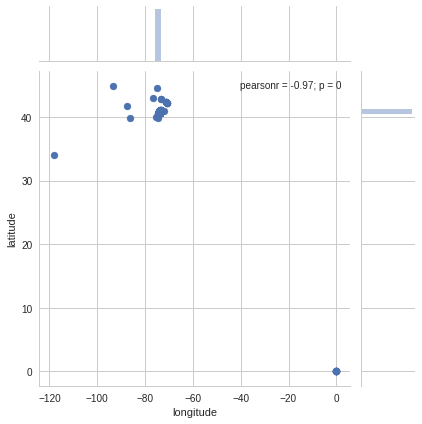

In [22]:
sns.jointplot(x='longitude', y='latitude', data=df_select)

Lets narrow down the window into where most of the data is present,

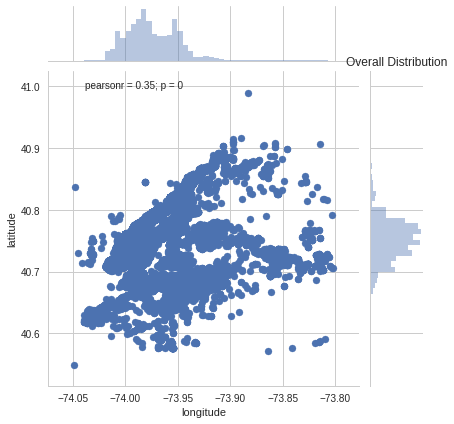

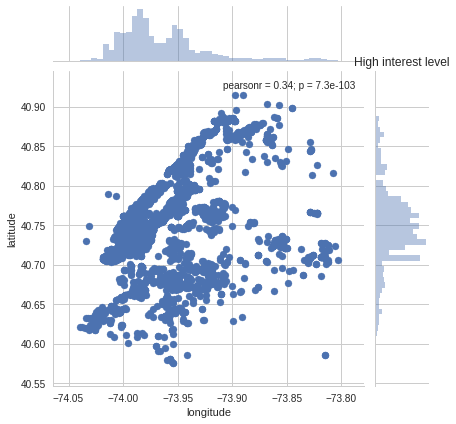

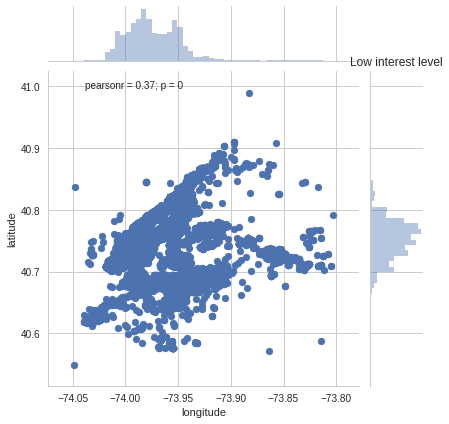

In [23]:
sns.jointplot(x='longitude', y='latitude', data=df_select.loc[(df_select['longitude'] <= -73.8) &
                                                              (df_select['longitude'] > -74.05) &
                                                              (df_select['latitude'] < 41) & 
                                                              (df_select['latitude'] > 40.4 )])

sns.plt.title('Overall Distribution')
plt.figure()
sns.jointplot(x='longitude', y='latitude', data=df_select.loc[(df_select['longitude'] <= -73.8) &
                                                              (df_select['longitude'] > -74.05) &
                                                              (df_select['latitude'] < 41) & 
                                                              (df_select['latitude'] > 40.4 ) & 
                                                              (df_select['interest_level'] == 'high' )])
sns.plt.title('High interest level')
plt.figure()
sns.jointplot(x='longitude', y='latitude', data=df_select.loc[(df_select['longitude'] <= -73.8) &
                                                              (df_select['longitude'] > -74.05) &
                                                              (df_select['latitude'] < 41) & 
                                                              (df_select['latitude'] > 40.4 ) & 
                                                              (df_select['interest_level'] == 'low' )])
sns.plt.title('Low interest level')


Now we try plotting the info using lmplot

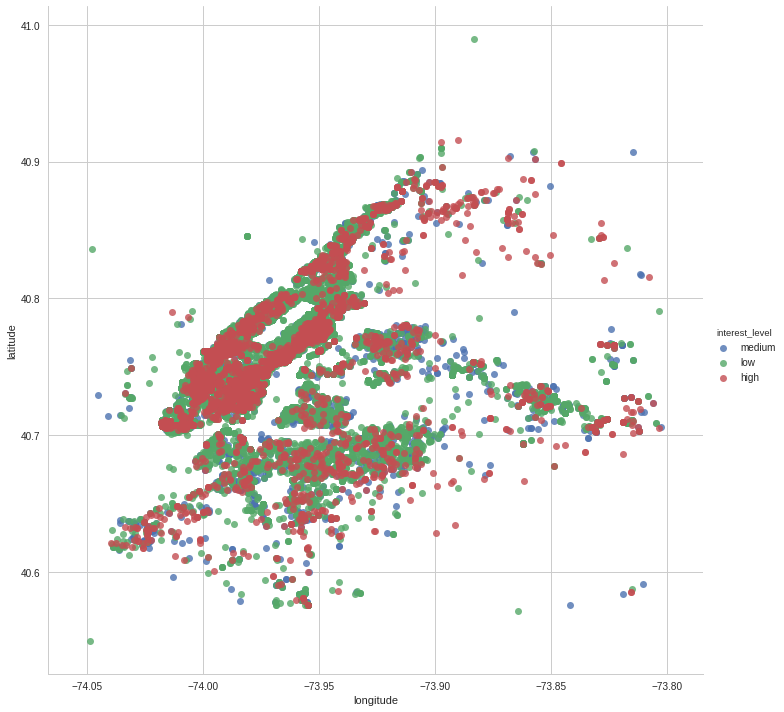

In [24]:
sns.lmplot(x='longitude', y='latitude',size=10 ,fit_reg=False, hue='interest_level',data=df_select.loc[(df_select['longitude'] <= -73.8) &
                                                              (df_select['longitude'] > -74.05) &
                                                              (df_select['latitude'] < 41) & 
                                                              (df_select['latitude'] > 40.4 )])

The figure above gives us a pretty good idea about the overall distribution of interest level with geographical location. Visually, there arent specific areas with a high concentration of only one interest_type property

## Exploring text features

We now take a look at the text features present in 'description' and 'features' columns. 

In [25]:
df['description'].iloc[2]

'Top Top West Village location, beautiful Pre-war building with laundry in the basement and live in super!<br/><br/>Apartment features a large bedroom with closet. Separate living room, kitchen features granite tops, dishwasher and microwave included, marble bathroom and hardwood flooring. Building is very well maintained and conveniently located near A,C,E,L,1,2,3 trains. Surrounded by many local cafe?s, restaurants, available for November 1st move in!<br/><br/>To view this apartment or any other please contact me via email or call at the number listed.<br/><br/><br/><br/><br/><br/>Bond New York is a real estate broker that supports equal housing opportunity.<p><a  website_redacted '

In [26]:
df['features'].iloc[2]

['Laundry In Building',
 'Dishwasher',
 'Hardwood Floors',
 'Pets Allowed Case by Case']

In [27]:
len(df['description'])

49352

In [28]:
len(df['features'])

49352

The descriptions are more verbose, and contain lengthy descriptions of the rental property. Features columns appear to be shorter, with commonly used tags.

One approach would be to concatenate all the features tags, add it as a line in the description, and tokenize this modified description using the scikit-learn count vectorizer


In [29]:
for k in df['features'].iloc[2]: print (k)

Laundry In Building
Dishwasher
Hardwood Floors
Pets Allowed Case by Case


In [30]:
' '.join(df['features'].iloc[2]) # converting to a single sentence

'Laundry In Building Dishwasher Hardwood Floors Pets Allowed Case by Case'

In [31]:
df['description'].iloc[2] + (' '.join(df['features'].iloc[2]))

'Top Top West Village location, beautiful Pre-war building with laundry in the basement and live in super!<br/><br/>Apartment features a large bedroom with closet. Separate living room, kitchen features granite tops, dishwasher and microwave included, marble bathroom and hardwood flooring. Building is very well maintained and conveniently located near A,C,E,L,1,2,3 trains. Surrounded by many local cafe?s, restaurants, available for November 1st move in!<br/><br/>To view this apartment or any other please contact me via email or call at the number listed.<br/><br/><br/><br/><br/><br/>Bond New York is a real estate broker that supports equal housing opportunity.<p><a  website_redacted Laundry In Building Dishwasher Hardwood Floors Pets Allowed Case by Case'

In [32]:
# apply the above formula to the whole dataframe

In [33]:
def textJoin(df_row):
    return (df_row['description'] + (' '.join(df_row['features'])))

In [34]:
text_features = df.apply(textJoin, axis=1)

In [35]:
text_features.iloc[7]

'This huge sunny ,plenty of lights 1 bed/2 bath offers you a brand new  kitchen,open to the living space, with stainless steel appliances,granite counters,plenty of  cabinet spaces ,dishwasher,micro,marble bath with stand up shower and foldable closets throughout the apartment and your OWN OUTDOOR SPACE!!!The building comes with an elevator,gym,laundry,24 hour doorman and beautiful roof deck/terrace with breathtaking view to the city!gut reno,ss app,dish washer,closets,marble bath,laundry,elevator,drmn,gym,roofdeck<br /><br />Your future new apartment is located in west Chelsea,near amazing restaurants ,shops,art galleries and nightlife!Close to the famous Highline, Chelsea Piers and the Chelsea Market<br /><br />Call or e mail me for any further information or to schedule a viewing.As an expert of the area, I have access to all available apartments.I look forward to help you finding your dream home!<br /><br /><p><a  website_redacted Doorman Elevator Pre-War Terrace Laundry in Unit Di

In [36]:
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [37]:
# reindex the data
df.reset_index(inplace=True, drop=True)
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
1,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
2,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
3,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
4,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [38]:
text_features.reset_index(drop=True,inplace=True)

In [39]:
df['text_combine'] = df.apply(textJoin, axis=1)

In [40]:
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,text_combine
0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...
1,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,Doorman Elevator Fitness Center Cats A...
2,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street,"Top Top West Village location, beautiful Pre-w..."
3,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street,Building Amenities - Garage - Garden - fitness...
4,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street,Beautifully renovated 3 bedroom flex 4 bedroom...


In [41]:
#text_data = df[['text_combine','interest_level']]
#text_data.head()

In [42]:
df = df[ df.text_combine.apply(lambda x: x.isspace()) != True ]
len(df)

48983

In [43]:
#count=0

#def fun_1(x):
#    global count
#    if x == ' ': count=count+1

#text_data['text_combine'].apply(fun_1)
#count

In [44]:
# text_data = text_data[text_data.text_combine != ' ']

Now the text data and interest level are in a clean form which can be input to scikit-learn's text processing algorithms

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# text_mnb = Pipeline([('vec', CountVectorizer()),
#                    ('tfidf', TfidfTransformer()),
#                    ('mnb', MultinomialNB())])

We now set up the features vectors and the target output, which is the interest level

In [46]:
df.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'interest_level', 'latitude',
       'listing_id', 'longitude', 'manager_id', 'photos', 'price',
       'street_address', 'text_combine'],
      dtype='object')

In [47]:
X = df[['bathrooms', 'bedrooms', 'latitude', 'longitude', 'price', 'text_combine']]
X.head()

,bathrooms,bedrooms,latitude,longitude,price,text_combine
0,1.5,3,40.7145,-73.9425,3000,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...
1,1.0,2,40.7947,-73.9667,5465,Doorman Elevator Fitness Center Cats A...
2,1.0,1,40.7388,-74.0018,2850,"Top Top West Village location, beautiful Pre-w..."
3,1.0,1,40.7539,-73.9677,3275,Building Amenities - Garage - Garden - fitness...
4,1.0,4,40.8241,-73.9493,3350,Beautifully renovated 3 bedroom flex 4 bedroom...


In [48]:
y = df['interest_level']
y.head()

0    medium
1       low
2      high
3       low
4       low
Name: interest_level, dtype: object

The text_combine field is vectorized

In [49]:
count_vec = CountVectorizer()
X_counts = count_vec.fit_transform(X['text_combine'])

In [50]:
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

In [51]:
X_tfidf

<48983x38672 sparse matrix of type '<class 'numpy.float64'>'
	with 3713622 stored elements in Compressed Sparse Row format>

Now we need to join our other features with this sparse matrix

In [52]:
import scipy as sp
X2 = sp.sparse.hstack((X[['bathrooms','bedrooms','latitude','longitude','price']].values,X_tfidf),format='csr')
X2.columns = X[['bathrooms','bedrooms','latitude','longitude','price']].columns.tolist()+count_vec.get_feature_names()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=101)

In [68]:
#from sklearn.naive_bayes import GaussianNB
#gnb = GaussianNB()
#gnb.fit(X_train, y_train)
#from sklearn.svm import LinearSVC
#svc = LinearSVC()

## Further steps to be done include:
1. To reduce dimensionality of the data
2. Use ensemble methods
3. Find classifiers for sparse matrix

In [67]:
#svc.fit(X_train,y_train)

In [60]:
#predictions = svc.predict(X_test)

In [61]:
#from sklearn.metrics import classification_report, confusion_matrix

In [66]:
#print(confusion_matrix(y_test, predictions))

In [64]:
#print(classification_report(predictions, y_test))

In [ ]:
# from sklearn.naive_bayes import MultinomialNB
# mnb = MultinomialNB()
# mnb.fit(X_train, y_train)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)